In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split # for splitting the data into training and testing sets
from sklearn.linear_model import LogisticRegression, Ridge, Lasso # models we are going to use
from sklearn.metrics import r2_score # for comparing the predicted and test values
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
from matplotlib import pyplot as plt

## Data Processing

In [2]:
df = pd.read_csv("../data/data.csv", encoding="ISO-8859-1")

In [3]:
df.head(5)

,Unnamed: 0,userIDs,implementation,Line_ID,ChatGroup,content,group_id,RoleName,roomName,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,OutcomeScore,wordCount
0,1,1,a,1,PRNLT,Hello team. Welcome to Nephrotex!,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,5
1,2,1,a,2,PRNLT,I'm Maria Williams. I'll be your design adviso...,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,11
2,3,1,a,3,PRNLT,I'm here to help if you have any questions.,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,9
3,4,1,a,4,PRNLT,Please introduce yourselves with the name you ...,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,1,0,0,4,51
4,5,1,a,5,PRNLT,I just want to make sure everyone has found th...,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,39


In [4]:
df.describe()

,Unnamed: 0,userIDs,Line_ID,group_id,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,OutcomeScore,wordCount
count,19180.000000,19180.000000,19180.000000,19180.000000,19180.000000,19180.000000,19180.000000,19180.000000,19180.000000,19180.000000,19180.000000,19180.000000
mean,9590.500000,202.433212,9592.793796,3.916736,0.028728,0.102868,0.187018,0.018144,0.052242,0.021064,3.741606,12.489520
std,5536.933417,118.355170,5537.800672,1.397935,0.167045,0.303794,0.389936,0.133475,0.222520,0.143600,1.464839,14.117233
min,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4795.750000,96.000000,4796.750000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000
50%,9590.500000,204.000000,9593.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,9.000000
75%,14385.250000,317.000000,14388.250000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,17.000000
max,19180.000000,393.000000,19183.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1032.000000


In [5]:
XX = df[["m_experimental_testing","m_making_design_choices","m_asking_questions","j_customer_consultants_requests","j_performance_parameters_requirements","j_communication","wordCount"]]
Y = df[["OutcomeScore"]]
X = (XX-XX.mean())/XX.std()

In [6]:
ros = RandomOverSampler(random_state=0)
x_resampled, y_resampled = ros.fit_resample(X, Y)

In [7]:
X_train,X_test,y_train,y_test=train_test_split(x_resampled, y_resampled, train_size=0.8, random_state=0) 

## Logistic Regression

In [8]:
logisticRegr = LogisticRegression(random_state=0)
logisticRegr.fit(X_train, y_train.values.ravel());

## Visualising Results

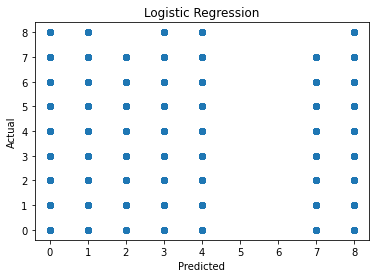

In [9]:
y_pred=logisticRegr.predict(X_test) # calculate the predicted values of the model for the test features
plt.scatter(y_pred,y_test) # plot the predicted values against the actual test values
plt.xlabel('Predicted') # xlabel
plt.ylabel('Actual') # ylabel 
plt.title('Logistic Regression'); # add a title

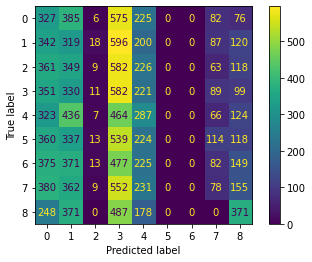

In [10]:
plot_confusion_matrix(logisticRegr, X_test, y_test);